<a href="https://colab.research.google.com/github/MoMahdi1/ML-algo_Revision/blob/main/Mnist_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
pip install tensorflow


In [5]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
X_train.min() , X_train.max() , X_test.min() , X_test.max()

(0, 255, 0, 255)

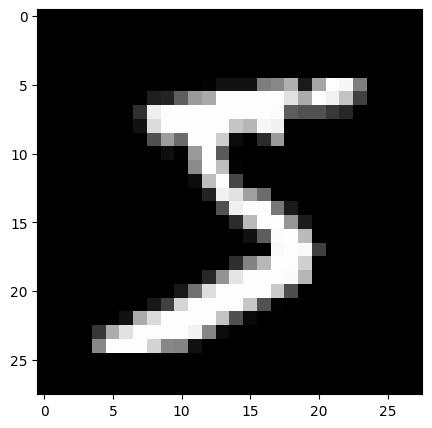

In [15]:
## Visualize a sample image
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.imshow(X_train[0] , cmap='gray')

In [16]:
X_train = X_train.reshape(-1,784) / 255
X_test = X_test.reshape(-1,784) / 255

In [18]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [19]:
X_train.min(), X_train.max(), X_test.min(), X_test.max()

(0.0, 1.0, 0.0, 1.0)

In [20]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [25]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [26]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [27]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [28]:
# Build the model.
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model.
model.compile(optimizer='Adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary.
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Train the model.
model.fit(X_train, y_train, epochs=10, batch_size=32)
print("Training complete.\n")

# Evaluate the model.
print("Evaluating the model on test data...")
model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8650 - loss: 0.4663
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9620 - loss: 0.1294
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9740 - loss: 0.0865
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9789 - loss: 0.0668
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9835 - loss: 0.0556
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9851 - loss: 0.0459
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9885 - loss: 0.0361
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9892 - loss: 0.0333
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9913 - loss: 0.0263
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9909 - loss: 0.0261
Training complete.

Evaluating the model on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9672 - 

[0.1055765151977539, 0.9728000164031982]

In [30]:
# Batch vs Epoch
batch_size = 32
training_samples = 60000
iterations_per_epoch = training_samples/batch_size
iterations_per_epoch


1875.0

In [32]:
# Activation functions
from tensorflow.keras.activations import relu, sigmoid, linear, softmax, tanh

# Optimizer
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

# loss function
from keras.src.losses.losses import mean_squared_error, mean_absolute_error # Import mean_squared_error and mean_absolute_error directly from their new location
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy, sparse_categorical_crossentropy # Other imports remain the same

In [33]:
def build_model(hidden_activation='relu', output_activation='softmax', optimizer='adam', loss='categorical_crossentropy'):
    model = Sequential()
    model.add(Dense(64, input_shape=(784,), activation=hidden_activation))
    model.add(Dense(64, activation=hidden_activation))
    model.add(Dense(10, activation=output_activation))
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model


In [34]:
my_model = build_model()
my_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
my_model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8607 - loss: 0.4786
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9607 - loss: 0.1299
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9725 - loss: 0.0860
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9778 - loss: 0.0678
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9823 - loss: 0.0542
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9849 - loss: 0.0472
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9868 - loss: 0.0407
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9885 - loss: 0.0340
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9913 - loss: 0.0270
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9905 - loss: 0.0268


In [36]:
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=10, batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9940 - loss: 0.0192 - val_accuracy: 0.9879 - val_loss: 0.0381
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9937 - loss: 0.0187 - val_accuracy: 0.9894 - val_loss: 0.0316
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9953 - loss: 0.0144 - val_accuracy: 0.9855 - val_loss: 0.0441
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9959 - loss: 0.0134 - val_accuracy: 0.9860 - val_loss: 0.0437
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9950 - loss: 0.0145 - val_accuracy: 0.9838 - val_loss: 0.0544
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9954 - loss: 0.0140 - val_accuracy: 0.9879 - val_loss: 0.0431
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9959 - loss: 0.0109 - val_accuracy: 0.9875 - val_loss: 0.0465
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9963 - loss: 0.0109 -

In [37]:
batch_size = 32
training_samples = 0.8 * 60000
iterations_per_epoch = training_samples/batch_size
iterations_per_epoch

1500.0

In [38]:
print(history.params)


{'verbose': 'auto', 'epochs': 10, 'steps': 1500}


In [39]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [40]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.992667,0.022090,0.987917,0.038076
1,0.992667,0.021600,0.989417,0.031579
2,0.993792,0.018785,0.985500,0.044121
3,0.994708,0.016452,0.986000,0.043689
4,0.994292,0.016440,0.983833,0.054443


<Axes: >

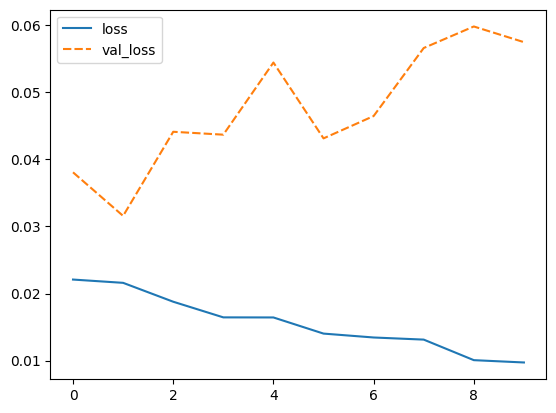

In [41]:
# Plot the loss
import seaborn as sns
sns.set_style()
sns.lineplot(data=history_df[['loss', 'val_loss']])

<Axes: >

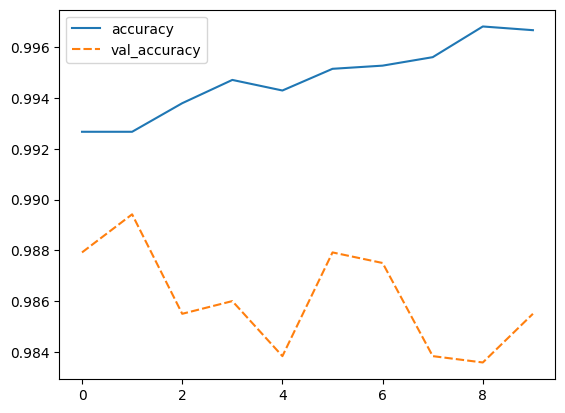

In [42]:
# Plot the accuracy
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])